In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from today
query_date = dt.date(2017, 8, 23) + dt.timedelta(days=-365)

In [13]:
# Perform a query to retrieve the data and precipitation scores
precipitation_score = session.query(Measurement.id, Measurement.date, Measurement.prcp, Measurement.station).\
    filter(Measurement.date >= query_date).\
    filter(Measurement.date <= dt.date.today()).all()

In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column
date = []
prcp_score =[]
m_id = []
reporting_station = []

for score in precipitation_score:
    date.append(score.date)
    prcp_score.append(score.prcp)
    m_id.append(score.id)
    reporting_station.append(score.station)
    
len(reporting_station)

2230

In [15]:
# Sort the dataframe by date
prcp_df = pd.DataFrame({'Id': m_id, 'Date': date, 'Precipitation Score': prcp_score}).set_index('Date', drop=False)

updated_prcp_df = pd.DataFrame(prcp_df.groupby(['Date']).max()['Precipitation Score'])

len(updated_prcp_df)

C:\Users\bella\Miniconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'Date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  after removing the cwd from sys.path.


366

<IPython.core.display.Javascript object>


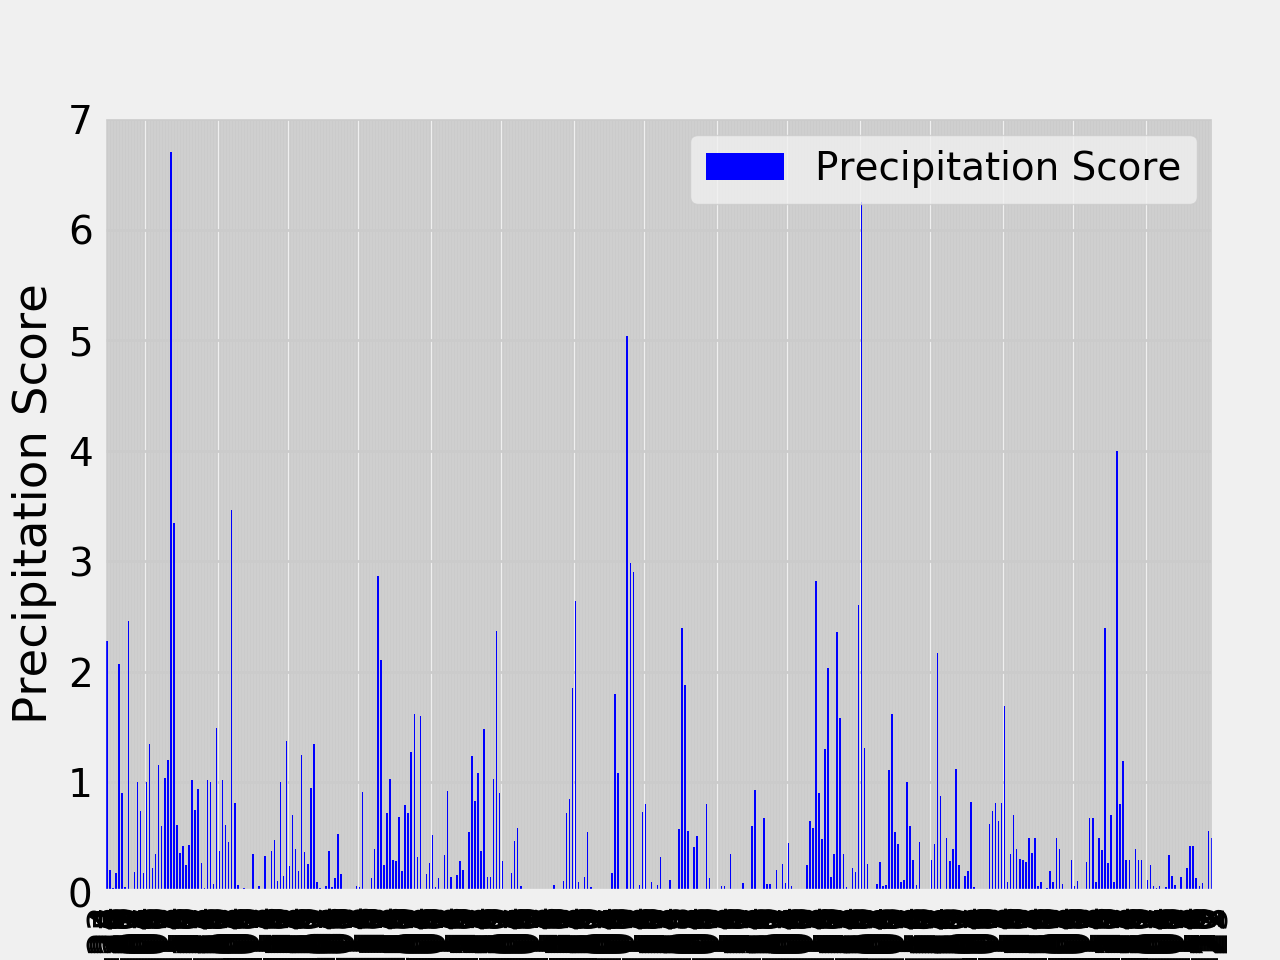

<IPython.core.display.Javascript object>


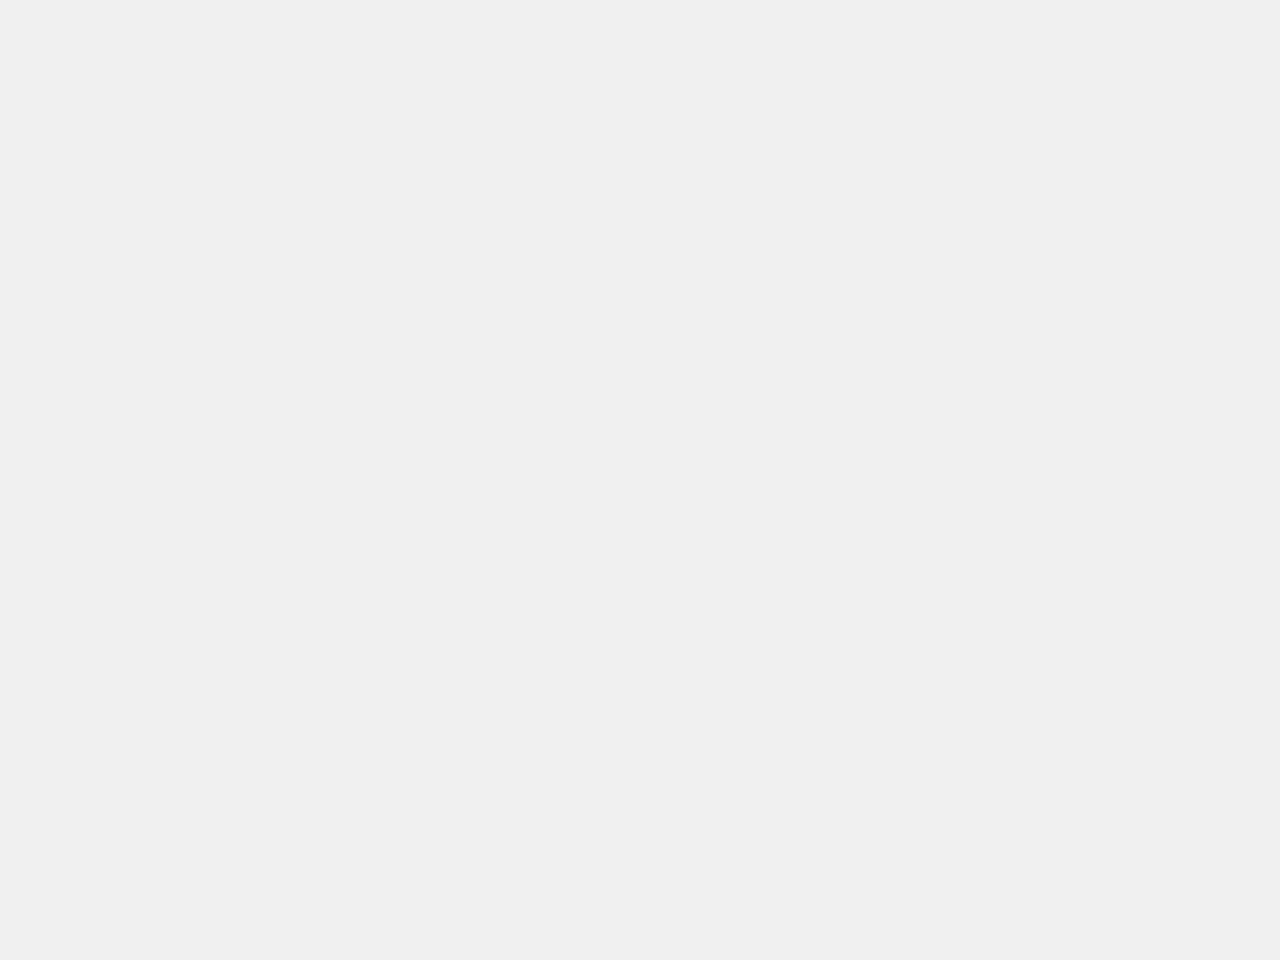

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = updated_prcp_df.plot(kind='bar',y='Precipitation Score',color='blue')
# plt.show()
#ax = updated_prcp_df.plot(x = 'Date',y = 'Precipitation Score', kind='bar', legend=True)
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation Score')
plt.figure()
plt.show()

<IPython.core.display.Javascript object>


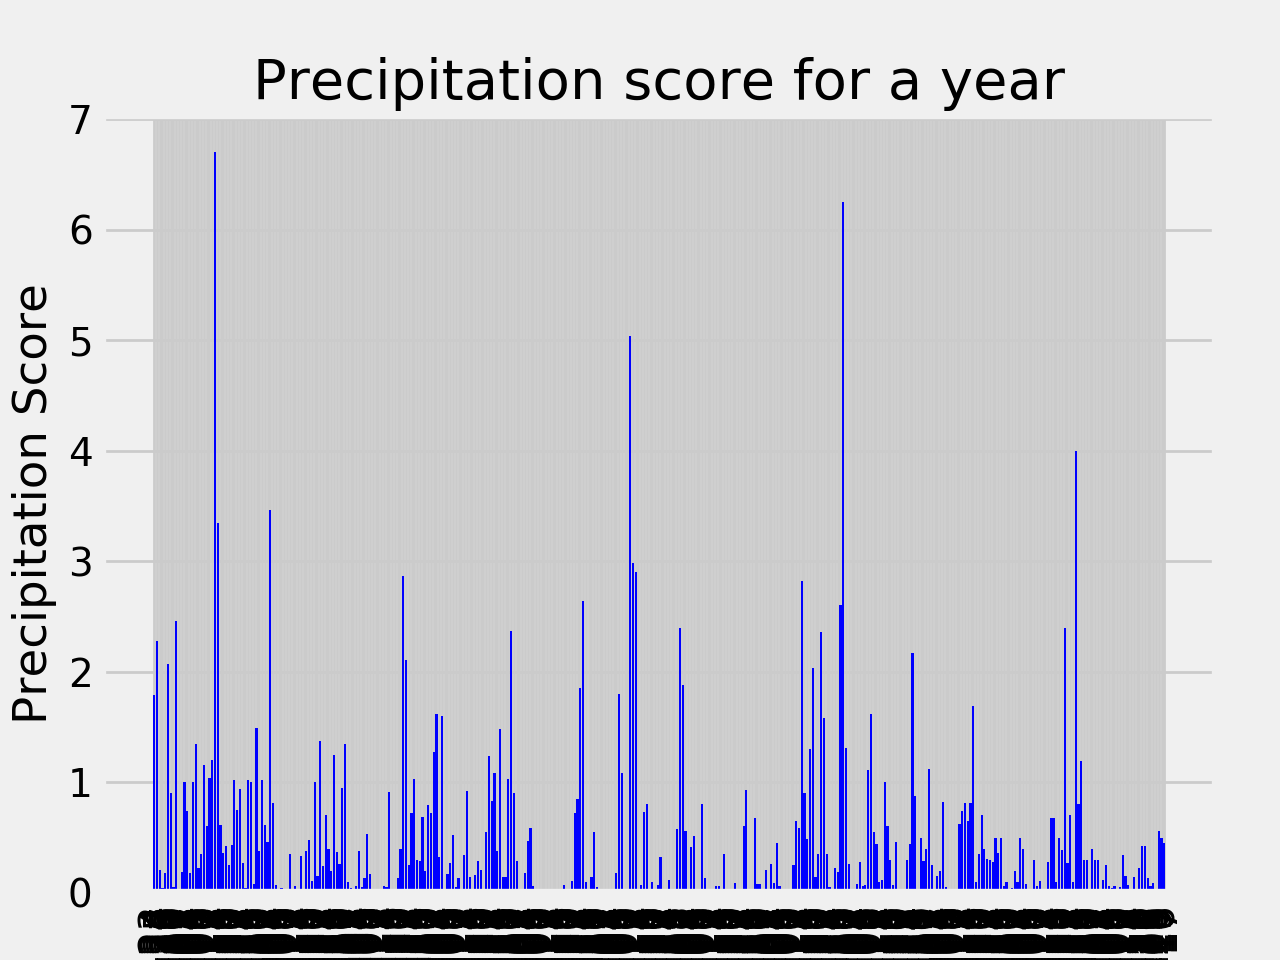

<IPython.core.display.Javascript object>


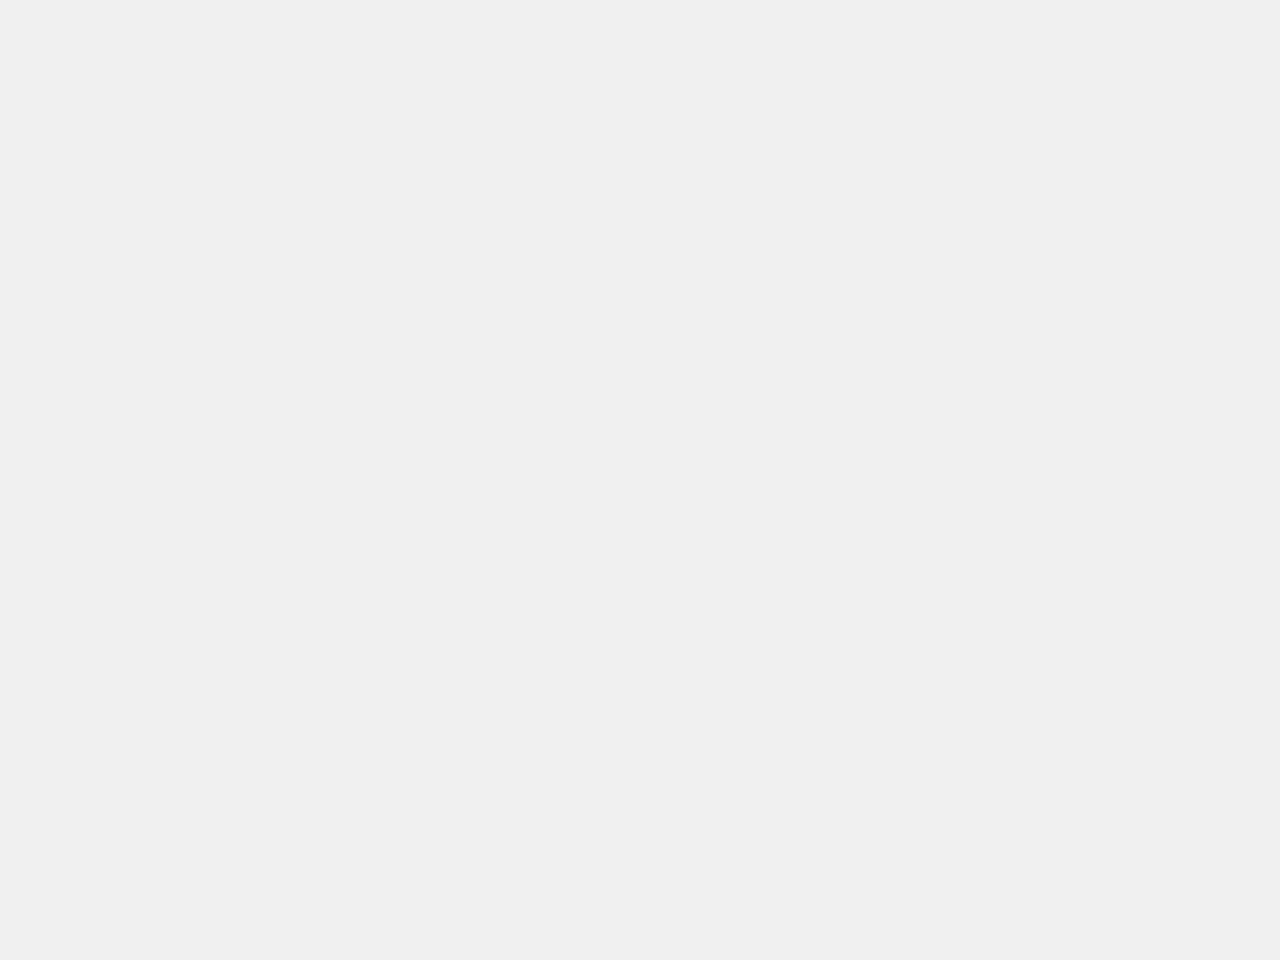

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
x_axis = range(0, len(updated_prcp_df))
#date_labels = updated_prcp_df['Date']
plt.bar(x_axis, updated_prcp_df['Precipitation Score'], color='blue')

plt.title("Precipitation score for a year")
plt.xlabel("Date")
plt.ylabel("Precipitation Score")

# Rotate the xticks for the dates
tick_locations = [value for value in x_axis]
labels = prcp_df['Date'].unique()
plt.xticks(tick_locations, labels, rotation = "vertical")

plt.figure()
plt.tight_layout()
plt.show()

In [42]:
# Use Pandas to calcualte the summary statistics for the precipitation data
updated_prcp_df.describe()

,Precipitation Score
count,366.000000
mean,0.520765
std,0.830728
min,0.000000
25%,0.040000
50%,0.250000
75%,0.672500
max,6.700000


In [67]:
# How many stations are available in this dataset?
station_num = session.query(func.count(Station.station)).all()

station_num

[(9)]

In [82]:
# What are the most active stations?
# List the stations and the counts in descending order.
station_activity = session.query(Measurement.station,(func.count(Measurement.id)).label('total_count')).\
                    group_by(Measurement.station).order_by("total_count desc").all()

station_activity

C:\Users\bella\Miniconda3\envs\PythonData\lib\site-packages\sqlalchemy\sql\compiler.py:760: SAWarning: Can't resolve label reference 'total_count desc'; converting to text() (this warning may be suppressed after 10 occurrences)
  util.ellipses_string(element.element),


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [83]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
station_temp = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                    filter(Measurement.station == 'USC00519281').all()
station_temp

[(54.0, 85.0, 71.66378066378067)]

<IPython.core.display.Javascript object>


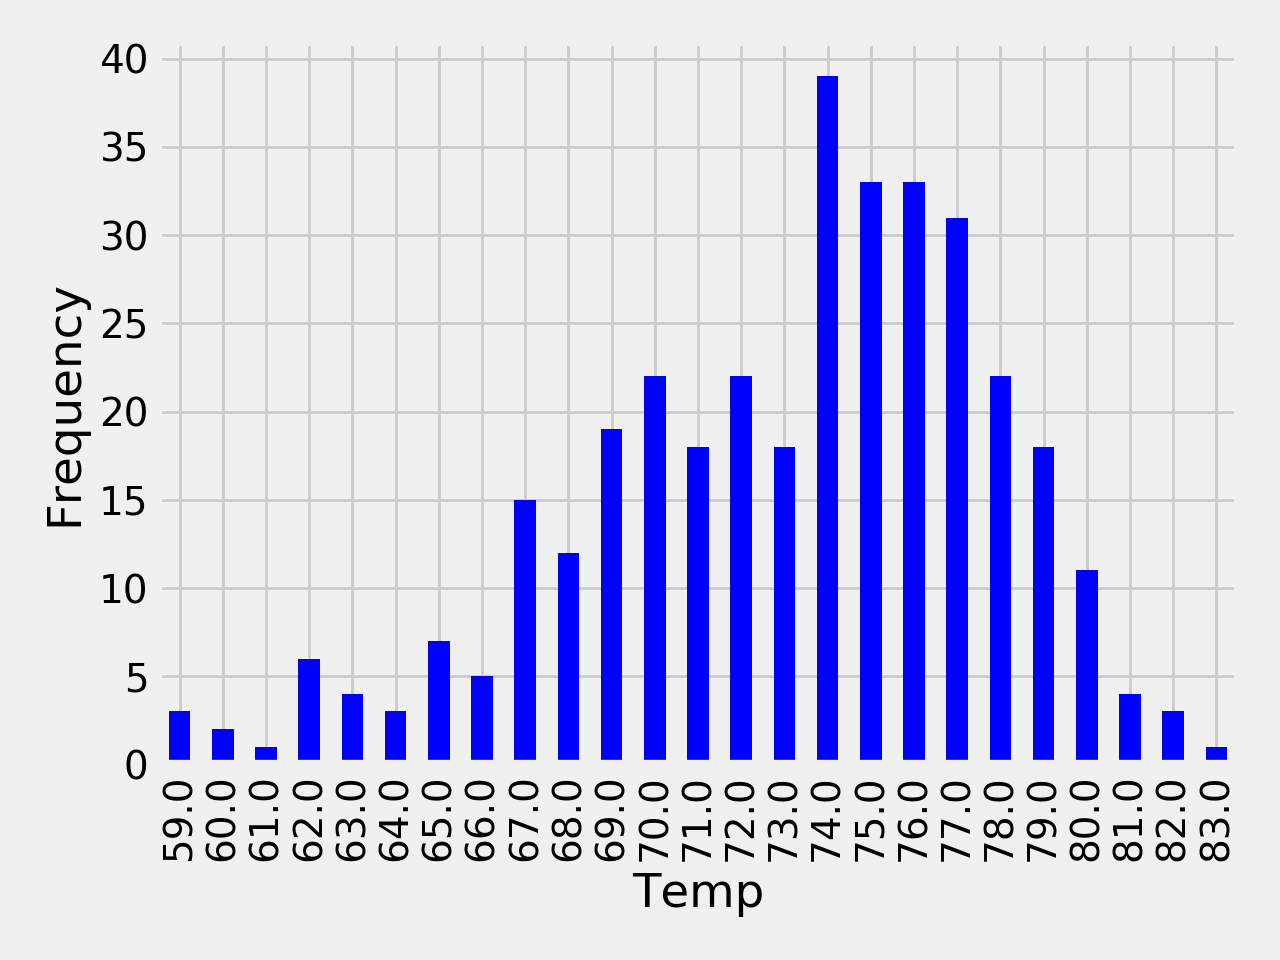

<IPython.core.display.Javascript object>


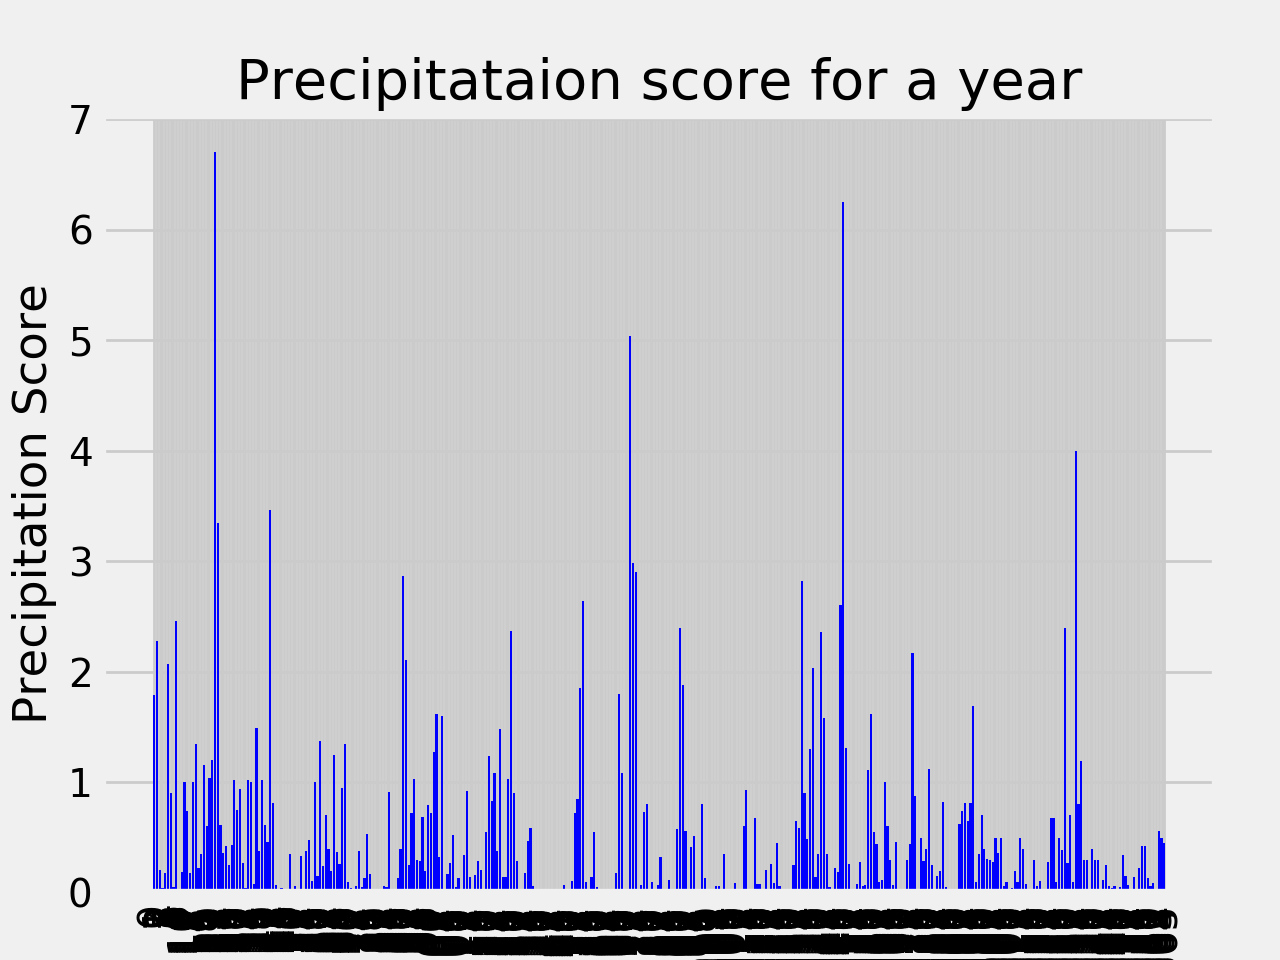

In [129]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_histo = session.query(Measurement.tobs, Measurement.id).filter(Measurement.station == 'USC00519281').\
                filter(Measurement.date >= query_date).\
                filter(Measurement.date <= dt.date.today()).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
temperature = []
t_id = []

for temp in station_histo:
    temperature.append(temp.tobs)
    t_id.append(temp.id)
    
temp_df = pd.DataFrame({'ID': t_id, 'Temperature': temperature})

updated_temp_df = pd.DataFrame(temp_df.groupby(['Temperature']).count()['ID'])

ax = updated_temp_df.plot(y = 'ID', kind='bar', color ='blue', legend = False)
ax.set_xlabel('Temp')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.figure()
plt.show()

# plt.hist(temp_df['Temperature'], color = 'blue', bins = 2)
# plt.xlabel('Temp')
# plt.ylabel('Frequency')
# plt.tight_layout()
# plt.show()

# updated_temp_df.plot.hist(alpha=0.5)

In [117]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [158]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
previous_time = ['2011-02-28', '2011-03-05']

previous_temp= calc_temps(previous_time[0], previous_time[1])

for t in previous_temp:
    temp = t

temp

(61.0, 69.75510204081633, 75.0)

<IPython.core.display.Javascript object>


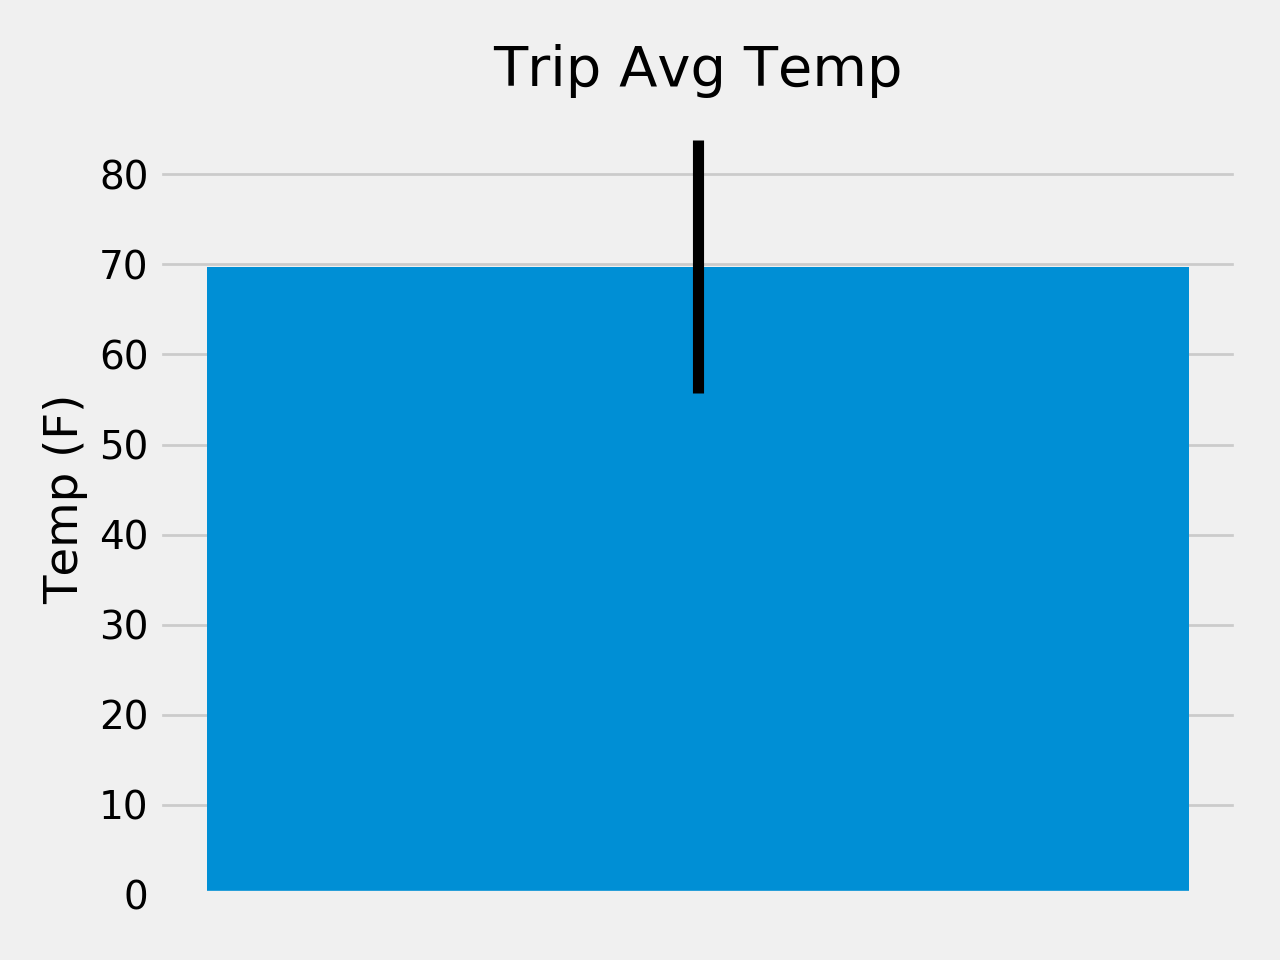

In [157]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.bar(0, temp[1], width=0.25, yerr=[temp[2]-temp[0]])
plt.ylabel('Temp (F)')
plt.title('Trip Avg Temp')
plt.xticks([])
plt.tight_layout()
plt.show()


In [164]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start_date = previous_time[0]
end_date = previous_time[1]
station_rainfall = session.query( Measurement.station, Station.name, func.max(Measurement.prcp).label('rainfall'), Station.latitude, Station.longitude, Station.elevation).\
                    filter(Measurement.station == Station.station).\
                    filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
                    group_by(Measurement.station).order_by('rainfall desc').all()

station_rainfall

C:\Users\bella\Miniconda3\envs\PythonData\lib\site-packages\sqlalchemy\sql\compiler.py:760: SAWarning: Can't resolve label reference 'rainfall desc'; converting to text() (this warning may be suppressed after 10 occurrences)
  util.ellipses_string(element.element),


[('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  1.7,
  21.33556,
  -157.71139,
  19.5),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  1.45,
  21.5213,
  -157.8374,
  7.0),
 ('USC00518838',
  'UPPER WAHIAWA 874.3, HI US',
  1.42,
  21.4992,
  -158.0111,
  306.6),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  1.25,
  21.45167,
  -157.84888999999998,
  32.9),
 ('USC00513117', 'KANEOHE 838.1, HI US', 1.05, 21.4234, -157.8015, 14.6),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  0.94,
  21.3331,
  -157.8025,
  152.4),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 0.88, 21.2716, -157.8168, 3.0),
 ('USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  0.6,
  21.3152,
  -157.9992,
  0.9),
 ('USC00517948', 'PEARL CITY, HI US', None, 21.3934, -157.9751, 11.9)]

## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


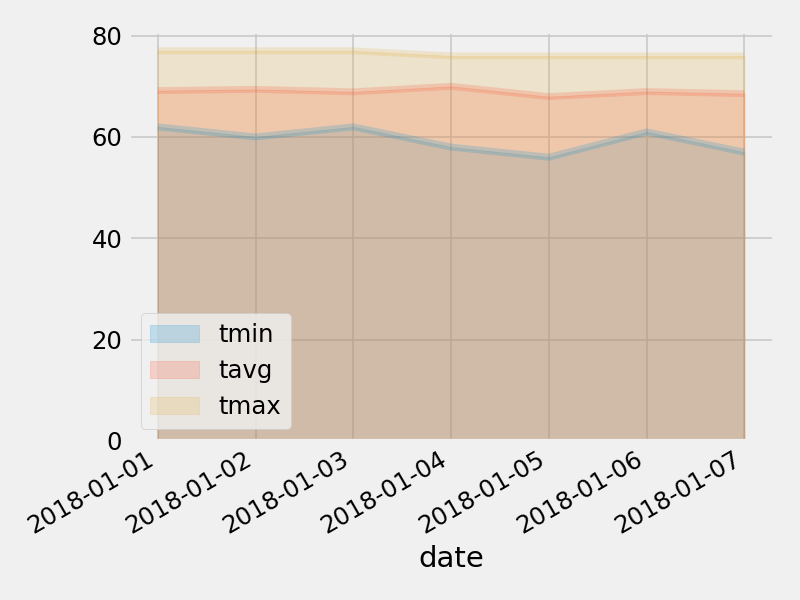

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
